<a href="https://colab.research.google.com/github/omarjamu/Inventory-Sample-Code/blob/main/fruit_images_classification_using_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing all the Necessary libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import matplotlib.image as mpimg
import random
from pathlib import Path
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img, img_to_array
import pathlib
import numpy as np
import PIL
import cv2


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

***Definning the dataset path***
* *os.walk() function: to traverse a directory tree starting from the path "../input/fruit-recognition".*
* *The current directory path is stored in the variable dirpath, the list of subdirectory names is stored in the variable dirnames, and the list of filenames is stored in the variable filenames.*

In [ ]:
for dirpath, dirnames, filenames in os.walk("../input/fruit-recognition"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in '../input/fruit-recognition'.
There are 1 directories and 0 images in '../input/fruit-recognition/test'.
There are 0 directories and 5641 images in '../input/fruit-recognition/test/test'.
There are 1 directories and 0 images in '../input/fruit-recognition/train'.
There are 33 directories and 0 images in '../input/fruit-recognition/train/train'.
There are 0 directories and 479 images in '../input/fruit-recognition/train/train/Orange'.
There are 0 directories and 738 images in '../input/fruit-recognition/train/train/Tomato'.
There are 0 directories and 490 images in '../input/fruit-recognition/train/train/Passion Fruit'.
There are 0 directories and 392 images in '../input/fruit-recognition/train/train/Cucumber Ripe'.
There are 0 directories and 490 images in '../input/fruit-recognition/train/train/Cactus fruit'.
There are 0 directories and 492 images in '../input/fruit-recognition/train/train/Pomegranate'.
There are 0 directories and 447 images in 

***Setting path for TRAIN AND TEST***

In [ ]:
train_path = "../input/fruit-recognition/train/train/"
test_path = "../input/fruit-recognition/test/test/"

In [ ]:

# Function to count the number of images in a directory
def count_images_in_directory(directory):
    total_images = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):  # Adjust file extensions as needed
                total_images += 1
    return total_images

# Count the number of images in the train and test directories
train_image_count = count_images_in_directory(train_path)
test_image_count = count_images_in_directory(test_path)

print("Number of images in train directory:", train_image_count)
print("Number of images in test directory:", test_image_count)


Number of images in train directory: 16854
Number of images in test directory: 5641


***Getting the Different class names from the directory***

In [ ]:
data_dir = pathlib.Path(train_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Apple Braeburn' 'Apple Granny Smith' 'Apricot' 'Avocado' 'Banana'
 'Blueberry' 'Cactus fruit' 'Cantaloupe' 'Cherry' 'Clementine' 'Corn'
 'Cucumber Ripe' 'Grape Blue' 'Kiwi' 'Lemon' 'Limes' 'Mango' 'Onion White'
 'Orange' 'Papaya' 'Passion Fruit' 'Peach' 'Pear' 'Pepper Green'
 'Pepper Red' 'Pineapple' 'Plum' 'Pomegranate' 'Potato Red' 'Raspberry'
 'Strawberry' 'Tomato' 'Watermelon']


***Plot a grid of images from a training dataset***

Orange Class Statistics:
Mean: 123.16061043841336
Standard Deviation: 91.06527314728349
Pixel Value Range: (0, 255)

Tomato Class Statistics:
Mean: 117.03435943992773
Standard Deviation: 102.95498423650908
Pixel Value Range: (0, 255)

Passion Fruit Class Statistics:
Mean: 145.4132062585034
Standard Deviation: 75.43341849805174
Pixel Value Range: (41, 255)

Cucumber Ripe Class Statistics:
Mean: 170.776299829932
Standard Deviation: 101.55027227127448
Pixel Value Range: (0, 255)

Cactus fruit Class Statistics:
Mean: 191.28123605442178
Standard Deviation: 77.6868882301276
Pixel Value Range: (0, 255)

Pomegranate Class Statistics:
Mean: 112.52547215447154
Standard Deviation: 92.12889433924651
Pixel Value Range: (0, 255)

Plum Class Statistics:
Mean: 96.94109463087248
Standard Deviation: 97.34704287180249
Pixel Value Range: (0, 255)

Pineapple Class Statistics:
Mean: 131.061282585034
Standard Deviation: 85.64695917390932
Pixel Value Range: (0, 255)

Papaya Class Statistics:
Mean: 145.0976136

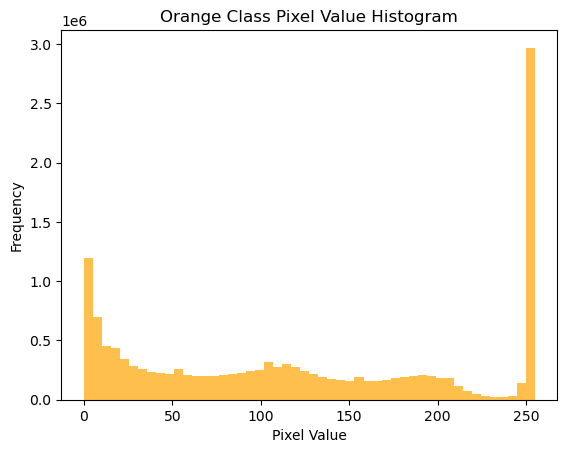

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Function to calculate image statistics for a specific class
def calculate_class_image_statistics(class_path):
    pixel_values = []
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        if os.path.isfile(img_path):  # Ensure it's a file
            img = Image.open(img_path)
            img_array = np.array(img)
            pixel_values.extend(img_array.flatten())
    pixel_values = np.array(pixel_values)
    mean = np.mean(pixel_values)
    std_dev = np.std(pixel_values)
    pixel_range = (np.min(pixel_values), np.max(pixel_values))
    return mean, std_dev, pixel_range

# Get all class directories in the train path
class_directories = [os.path.join(train_path, class_name) for class_name in os.listdir(train_path)]

# Calculate statistics for each class
for class_dir in class_directories:
    class_name = os.path.basename(class_dir)
    class_mean, class_std_dev, class_range = calculate_class_image_statistics(class_dir)
    print(f"{class_name} Class Statistics:")
    print("Mean:", class_mean)
    print("Standard Deviation:", class_std_dev)
    print("Pixel Value Range:", class_range)
    print()

# Visualize histogram of pixel values for one class (assuming "Orange" class)
orange_class_path = os.path.join(train_path, "Orange")
orange_image_paths = [os.path.join(orange_class_path, img_name) for img_name in os.listdir(orange_class_path)]
pixel_values = []
for img_path in orange_image_paths:
    img = Image.open(img_path)
    img_array = np.array(img)
    pixel_values.extend(img_array.flatten())
plt.hist(pixel_values, bins=50, color='orange', alpha=0.7)
plt.title('Orange Class Pixel Value Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()



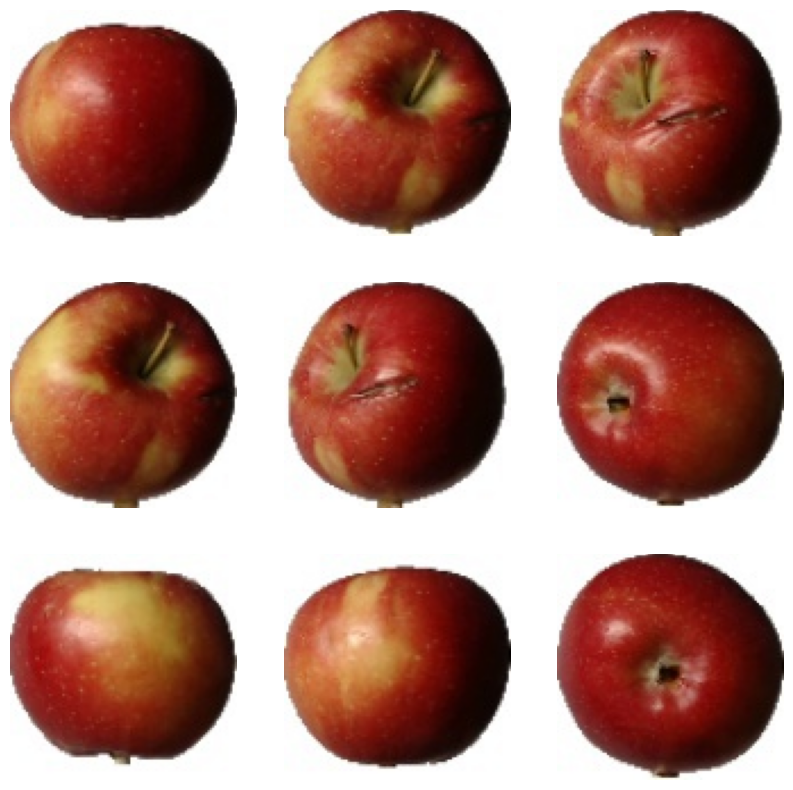

In [ ]:
fruits = list(data_dir.glob('Apple Braeburn/*.jpg'))

plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = PIL.Image.open(str(fruits[i]))
    plt.imshow(img)
    plt.axis('off')

plt.show()

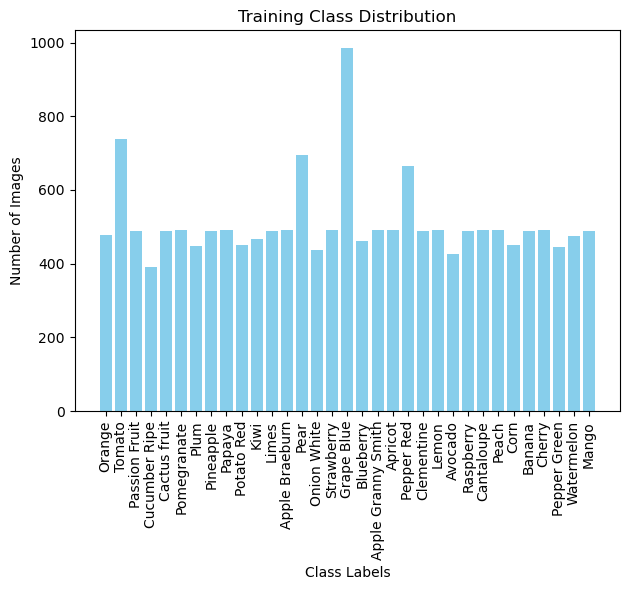

In [ ]:
import matplotlib.pyplot as plt
import pathlib
import os

# Define the paths to the train and test directories
train_path = "../input/fruit-recognition/train/train/"
test_path = "../input/fruit-recognition/test/test/"

# Function to count the number of images in each class
def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Count the number of images per class in the training and testing directories
train_class_counts = count_images_per_class(train_path)
test_image_count = sum(count_images_per_class(test_path).values())

# Create bar plots for both training and testing class distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(train_class_counts.keys(), train_class_counts.values(), color='skyblue')
plt.title('Training Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically


plt.tight_layout()
plt.show()

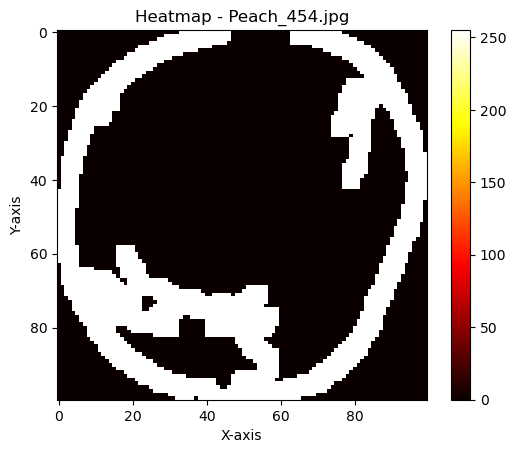

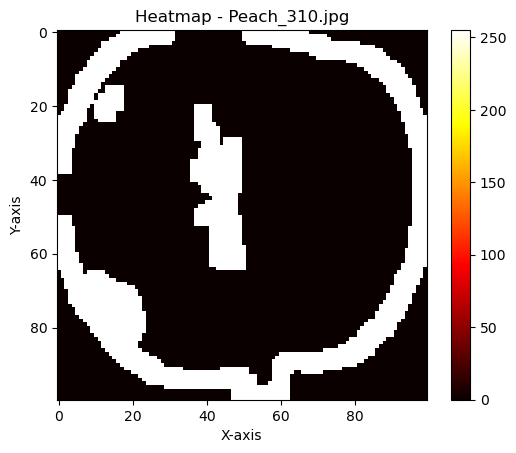

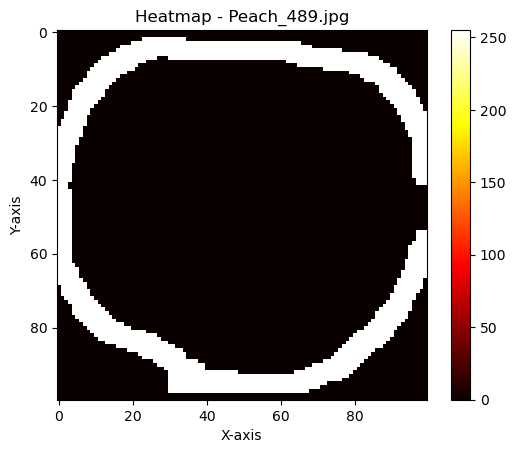

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pathlib

# Function to generate a heatmap based on edge detection
def generate_heatmap(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, 50, 150)

    # Dilate the edges to emphasize them
    kernel = np.ones((5,5), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)

    # Convert the dilated edges to a heatmap
    heatmap = dilated_edges.astype(float)

    return heatmap

# Define the data directory path
data_dir = pathlib.Path("../input/fruit-recognition/train/train/")

# Selecting 3 random image paths from the Peach class directory
selected_image_paths = np.random.choice(list(data_dir.glob("Peach/*.jpg")), 3, replace=False)

# Iterate over the selected image paths
for image_path in selected_image_paths:
    # Load an image
    image = cv2.imread(str(image_path))

    # Generate a heatmap for the image
    heatmap = generate_heatmap(image)

    # Create a figure and axes
    fig, ax = plt.subplots()

    # Display the heatmap
    heatmap_plot = ax.imshow(heatmap, cmap='hot')

    # Add a colorbar
    cbar = fig.colorbar(heatmap_plot)

    # Set the title and labels
    ax.set_title('Heatmap - {}'.format(image_path.name))
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')

    # Show the plot
    plt.show()


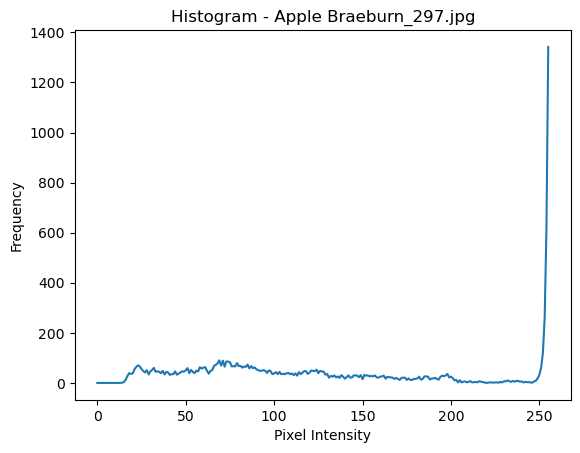

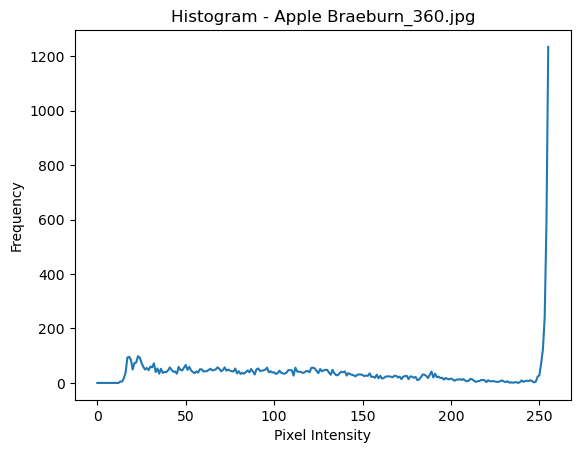

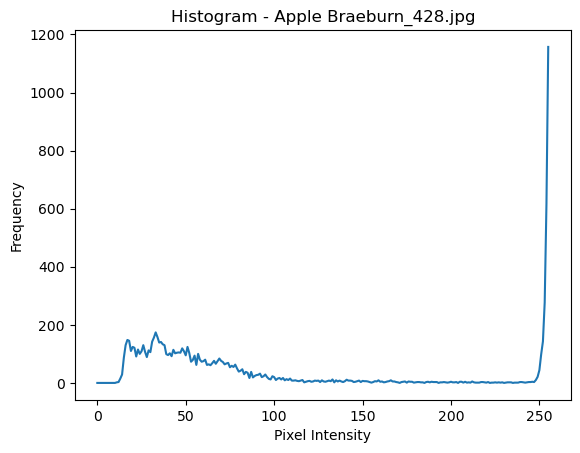

In [ ]:
# Select 3 random image paths from the directory
selected_image_paths = np.random.choice(list(data_dir.glob("Apple Braeburn/*.jpg")), 3, replace=False)

# Iterate over the selected image paths
for image_path in selected_image_paths:
    # Load an image
    image = cv2.imread(str(image_path))

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate histogram
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    # Plot histogram
    plt.figure()
    plt.title('Histogram - {}'.format(image_path.name))
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.plot(hist)
    plt.show()

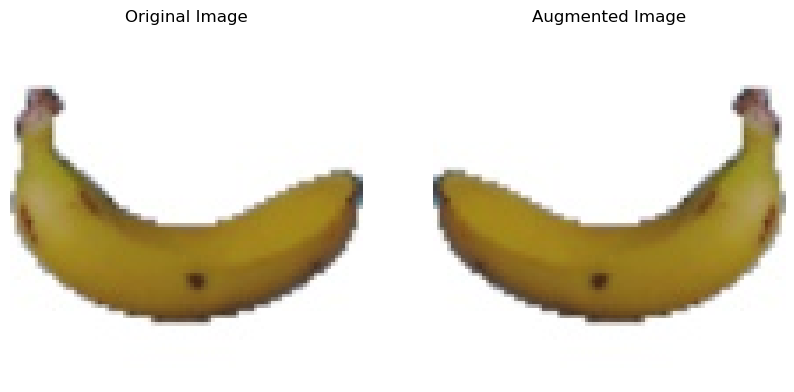

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Function to apply data augmentation to an image
def augment_image(image):
    # Apply data augmentation techniques
    # Example: flip horizontally
    augmented_image = cv2.flip(image, 1)  # 1 for horizontal flip, 0 for vertical flip

    return augmented_image

# Define paths to original images
original_image_dir = "../input/fruit-recognition/train/train/Banana"
# Choose one of the original images for augmentation
image_name = os.listdir(original_image_dir)[0]
original_image_path = os.path.join(original_image_dir, image_name)

# Load the original image
original_image = cv2.imread(original_image_path)

# Apply data augmentation
augmented_image = augment_image(original_image)

# Plot the original and augmented images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Augmented Image')
axes[1].axis('off')
plt.show()


In [ ]:
import os
import cv2

# Define the paths to the train and test directories
train_path = "../input/fruit-recognition/train/train/"
test_path = "../input/fruit-recognition/test/test/"

# Function to get the dimensions of an image
def get_image_dimensions(image_path):
    image = cv2.imread(image_path)
    if image is not None:
        return image.shape  # Return height, width, and number of channels
    else:
        return None

# Function to get all unique image sizes in a directory
def get_unique_image_sizes(directory):
    unique_sizes = set()  # Set to store unique sizes
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):  # Adjust file extensions as needed
                image_path = os.path.join(root, file)
                dimensions = get_image_dimensions(image_path)
                if dimensions is not None:
                    unique_sizes.add(dimensions)
    return unique_sizes

# Get unique image sizes for both train and test directories
unique_train_sizes = get_unique_image_sizes(train_path)
unique_test_sizes = get_unique_image_sizes(test_path)

# Print unique sizes
print("Unique image sizes in train directory:")
for size in unique_train_sizes:
    print(size)

print("\nUnique image sizes in test directory:")
for size in unique_test_sizes:
    print(size)



Unique image sizes in train directory:
(100, 100, 3)

Unique image sizes in test directory:
(100, 100, 3)


In [ ]:
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 100)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  return img

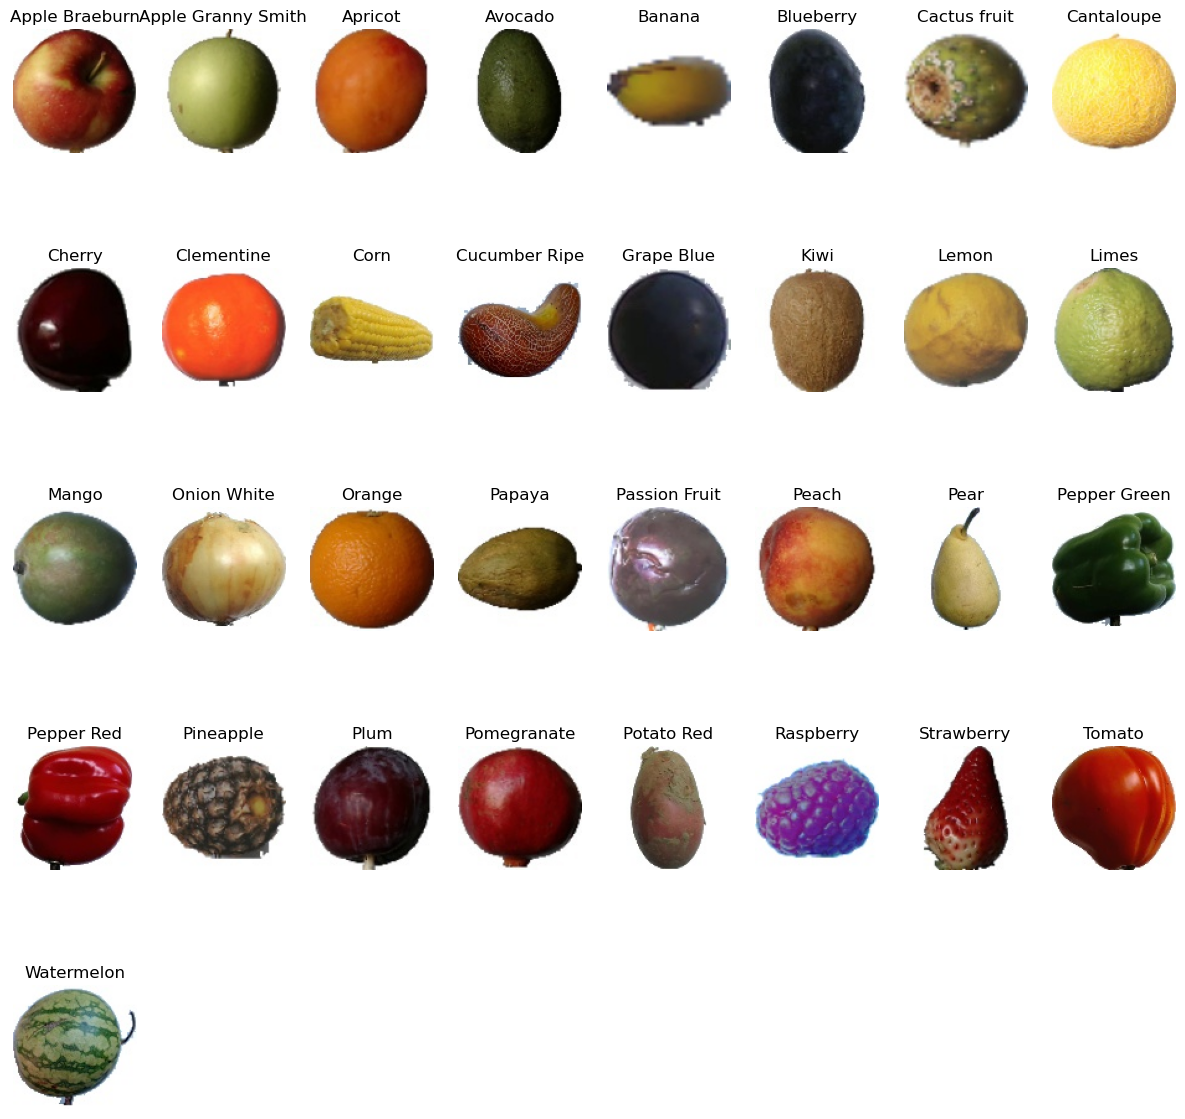

In [ ]:
plt.figure(figsize = (15,15))
# View a random image from the training dataset for all classes
for i in range(33):
    plt.subplot(5,8,i+1)
    img = view_random_image(target_dir=train_path,
                        target_class=class_names[i])

***Preparing VALIDATION Data***

In [ ]:
train_val_data = {'path' : [],
       'filename': [],
       'label': []}
for dirpath, dirnames, filenames in os.walk(train_path):
    for f in filenames:
        train_val_data['path'].append(dirpath)
        train_val_data['filename'].append(f)
        train_val_data['label'].append(f.split('_')[0])

In [ ]:
train_val_data_df = pd.DataFrame(train_val_data)
train_val_data_df.head()

,path,filename,label
0,../input/fruit-recognition/train/train/Orange,Orange_398.jpg,Orange
1,../input/fruit-recognition/train/train/Orange,Orange_20.jpg,Orange
2,../input/fruit-recognition/train/train/Orange,Orange_337.jpg,Orange
3,../input/fruit-recognition/train/train/Orange,Orange_190.jpg,Orange
4,../input/fruit-recognition/train/train/Orange,Orange_456.jpg,Orange


***Prepare the Testing Data***

In [ ]:
#Read test data and create a dataframe
test_data = {'path' : [],
       'filename': []}
for dirpath, dirnames, filenames in os.walk(test_path):
    for f in filenames:
        test_data['path'].append(dirpath)
        test_data['filename'].append(f)

In [ ]:
test_data_df = pd.DataFrame(test_data)
test_data_df.head()

,path,filename
0,../input/fruit-recognition/test/test/,0664.jpg
1,../input/fruit-recognition/test/test/,1269.jpg
2,../input/fruit-recognition/test/test/,3863.jpg
3,../input/fruit-recognition/test/test/,2193.jpg
4,../input/fruit-recognition/test/test/,0733.jpg


***Read Images and create numpy data array***

In [ ]:

images = []
label = []

for _, d in train_val_data_df.iterrows():
    img = load_img(os.path.join(d['path'],d['filename']))
    images.append(img_to_array(img))
    label.append(d['label'])

In [ ]:
images = np.array(images)
labels = np.array(label)
print(f"Complete data images shape: {images.shape} and label shape: {labels.shape}")

Complete data images shape: (16854, 100, 100, 3) and label shape: (16854,)


In [ ]:
test_images = []

for _, d in test_data_df.iterrows():
    img = load_img(os.path.join(d['path'],d['filename']))
    test_images.append(img_to_array(img))

test_images = np.array(test_images)
print(f"Test images shape: {test_images.shape} ")

Test images shape: (5641, 100, 100, 3) 


***Label Encoding***

In [ ]:
class_indices = dict(zip(class_names, range(len(class_names))))

labels_encoded = list(map(class_indices.get, labels))

#Convert to categorical data using tensorflow
#labels to One-hot encoded
label_categorical = tf.keras.utils.to_categorical(labels_encoded, num_classes=len(class_names), dtype='uint8')


***Train And Validation split***

In [ ]:
train_im, valid_im, train_lab, valid_lab = train_test_split(images, label_categorical, test_size=0.20,
                                                            stratify=label_categorical,
                                                            random_state=40, shuffle = True)

In [ ]:
print ("train data shape after the split: ", train_im.shape)
print ('new validation data shape: ', valid_im.shape)
print ("validation labels shape: ", valid_lab.shape)

train data shape after the split:  (13483, 100, 100, 3)
new validation data shape:  (3371, 100, 100, 3)
validation labels shape:  (3371, 33)


In [ ]:
print ('train im and label types: ', type(train_im), type(train_lab))

training_data = tf.data.Dataset.from_tensor_slices((train_im, train_lab))
validation_data = tf.data.Dataset.from_tensor_slices((valid_im, valid_lab))
test_data = tf.data.Dataset.from_tensor_slices(test_images)

print ('check types; ', type(training_data), type(validation_data), type(test_data))

train im and label types:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
check types;  <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'> <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'> <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'>


In [ ]:
### check using element_spec

print (training_data.element_spec)
print (validation_data.element_spec)

### as expected, tensors of image and original label shape


### create an iterator and turn it into numpy array
train_iter = iter(training_data)
print(next(train_iter)[0].numpy(), '\n', next(train_iter)[1].numpy(), np.argmax(next(train_iter)[1].numpy()))

(TensorSpec(shape=(100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(33,), dtype=tf.uint8, name=None))
(TensorSpec(shape=(100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(33,), dtype=tf.uint8, name=None))
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]] 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
train_iter_im, train_iter_label = next(iter(training_data))
print (train_iter_im.numpy().shape, train_iter_label.numpy().shape)

(100, 100, 3) (33,)


In [ ]:
train_iter_im1, train_iter_label1 = next(training_data.as_numpy_iterator())
print (train_iter_im1.shape, train_iter_label1.shape)

(100, 100, 3) (33,)


In [ ]:
check_list = list(training_data.as_numpy_iterator())
print (len(check_list), check_list[1])

13483 (array([[[254., 255., 255.],
        [254., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 255., 255.],
        [254., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [

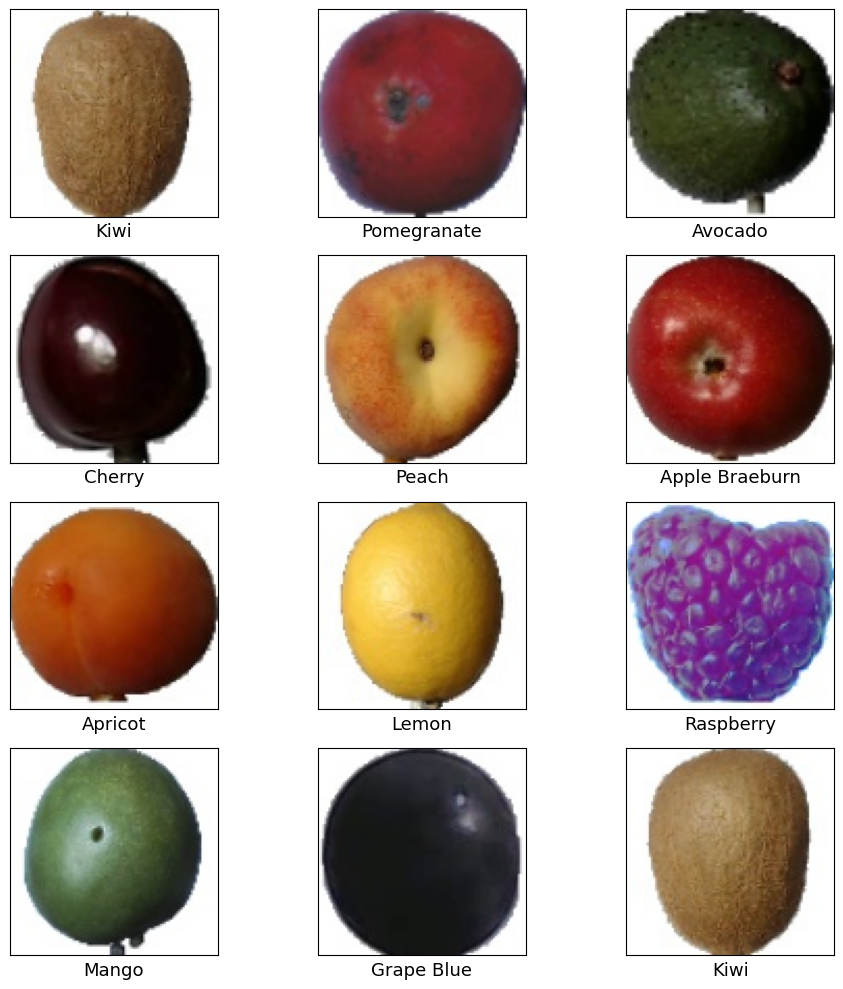

In [ ]:

fig = plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(check_list[i][0]/255.)
    plt.xlabel(class_names[np.argmax(check_list[i][1])], fontsize=13)
plt.tight_layout()
plt.show()

***Data Pipeline using`tf.data` & Prefetching***

In [ ]:
rescale_data = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1/255.)
])

data_augmenation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode = "horizontal"),
    #layers.experimental.preprocessing.RandomRotation(0.1)
])

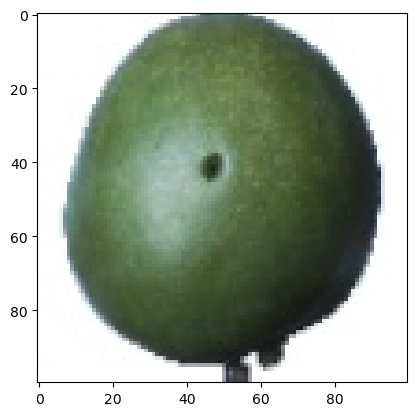

In [ ]:
random_image_index = random.randint(0,len(train_im))
img = rescale_data(train_im[random_image_index])
img = data_augmenation(img)
plt.imshow(img)

In [ ]:
BATCH_SIZE = 128
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment = False, test = False):
    if test:
        ds = ds.map(lambda x: (rescale_data(x)), num_parallel_calls=AUTOTUNE)
    else:
        ds = ds.map(lambda x, y: (rescale_data(x), y), num_parallel_calls=AUTOTUNE)

    if shuffle:
        ds = ds.shuffle(1000)

    #batch the data
    ds = ds.batch(BATCH_SIZE)

    # Use data augmentation only on the training set.
    if augment:
        ds = ds.map(lambda x, y: (data_augmenation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

    # Use buffered prefetching on all datasets.
    return ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
train_ds = prepare(training_data, shuffle = True, augment = True)
val_ds = prepare(validation_data)
test_ds = prepare(test_data, test=True)

***CNN Model***
* *The model consists of a convolutional layer, a max pooling layer, a flatten layer, and a dense (fully connected) layer with a softmax activation function*

In [ ]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=5,
                          kernel_size = 3,
                          activation = "relu",
                          input_shape = (100,100,3)),
    tf.keras.layers.MaxPool2D(pool_size =2,
                             padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model_1.compile(loss="categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 5)         140       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 5)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12005)             0         
                                                                 
 dense (Dense)               (None, 33)                396198    
                                                                 
Total params: 396,338
Trainable params: 396,338
Non-trainable params: 0
_________________________________________________________________


***Fitting The Model***

In [ ]:
#Fit the model on training data
history_1 = model_1.fit(train_ds,
                       epochs =25,
                       validation_data= val_ds)

Epoch 1/25
106/106 [==============================] - 29s 261ms/step - loss: 0.7691 - accuracy: 0.8087 - val_loss: 0.1039 - val_accuracy: 0.9881
Epoch 2/25
106/106 [==============================] - 26s 248ms/step - loss: 0.0638 - accuracy: 0.9907 - val_loss: 0.0363 - val_accuracy: 0.9920
Epoch 3/25
106/106 [==============================] - 26s 244ms/step - loss: 0.0215 - accuracy: 0.9981 - val_loss: 0.0205 - val_accuracy: 0.9979
Epoch 4/25
106/106 [==============================] - 27s 253ms/step - loss: 0.0105 - accuracy: 0.9998 - val_loss: 0.0102 - val_accuracy: 0.9994
Epoch 5/25
106/106 [==============================] - 27s 250ms/step - loss: 0.0071 - accuracy: 0.9998 - val_loss: 0.0080 - val_accuracy: 0.9991
Epoch 6/25
106/106 [==============================] - 27s 250ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 0.9988
Epoch 7/25
106/106 [==============================] - 26s 246ms/step - loss: 0.0034 - accuracy: 0.9999 - val_loss: 0.0073 - val_ac

***Plotting Graph for loss & accuracy***

<Axes: >

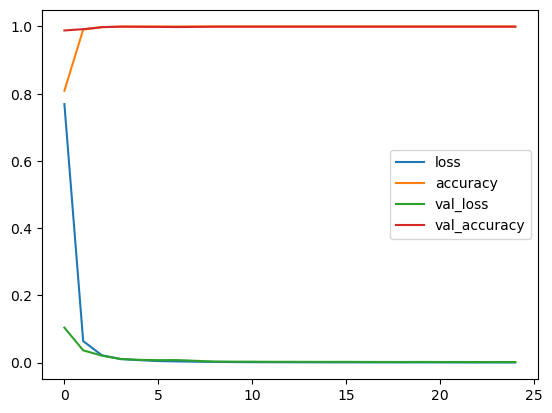

In [ ]:
#loss and accuracy plot
pd.DataFrame(history_1.history).plot()